In [1]:
from skimage.feature import hog
from skimage import data, exposure
from sklearn import svm
from sklearn.metrics import classification_report,accuracy_score
from sklearn.ensemble import RandomForestClassifier
import glob
import matplotlib.pyplot as plt
import numpy as np
import cv2
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
path = 'drive/My Drive/ColabDatasets/INRIA'

In [4]:
TRPosImg = []
for img in glob.glob(path+'/Train/pos/*.png'):
    n= cv2.imread(img)
    TRPosImg.append(n)
for img in glob.glob(path+'/Train/pos/*.jpg'):
    n= cv2.imread(img)
    TRPosImg.append(n)
TRNegImg = []
for img in glob.glob(path+'/Train/neg/*.png'):
    n= cv2.imread(img)
    TRNegImg.append(n)
for img in glob.glob(path+'/Train/neg/*.jpg'):
    n= cv2.imread(img)
    TRNegImg.append(n)


TEPosImg = []
for img in glob.glob(path+'/Test/pos/*.png'):
    n= cv2.imread(img)
    TEPosImg.append(n)
for img in glob.glob(path+'/Test/pos/*.jpg'):
    n= cv2.imread(img)
    TEPosImg.append(n)
TENegImg = []
for img in glob.glob(path+'/Test/neg/*.png'):
    n= cv2.imread(img)
    TENegImg.append(n)
for img in glob.glob(path+'/Test/neg/*.jpg'):
    n= cv2.imread(img)
    TENegImg.append(n)


In [5]:


Train_pos_fds = []
Train_pos_hog_images = []

Train_neg_fds = []
Train_neg_hog_images = []

Test_pos_fds = []
Test_pos_hog_images = []

Test_neg_fds = []
Test_neg_hog_images = []

#image resizing for standardization
n = 0
for img in TRPosImg:
  TRPosImg[n] = cv2.resize(img,(96,160))
  n+=1

n = 0
for img in TRNegImg:
  TRNegImg[n] = cv2.resize(img,(96,160))
  n+=1

n = 0
for img in TEPosImg:
  TEPosImg[n] = cv2.resize(img,(96,160))
  n+=1

n = 0
for img in TENegImg:
  TENegImg[n] = cv2.resize(img,(96,160))
  n+=1



for image in TRPosImg:
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
  Train_pos_fds.append(fd)
  Train_pos_hog_images.append(hog_image)

for image in TRNegImg:
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
  Train_neg_fds.append(fd)
  Train_neg_hog_images.append(hog_image)

for image in TEPosImg:
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
  Test_pos_fds.append(fd)
  Test_pos_hog_images.append(hog_image)
for image in TENegImg:
  fd, hog_image = hog(image, orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
  Test_neg_fds.append(fd)
  Test_neg_hog_images.append(hog_image)




In [6]:
TrainYpos = []
for n in Train_pos_fds:
  TrainYpos.append('pos')

TrainYpos = np.array(TrainYpos).reshape(len(TrainYpos),1)
Train_pos_fds = np.array(Train_pos_fds)
Train_pos = np.hstack((Train_pos_fds,TrainYpos))



TrainYneg = []
for n in Train_neg_fds:
  TrainYneg.append('neg')

TrainYneg = np.array(TrainYneg).reshape(len(TrainYneg),1)
Train_neg_fds = np.array(Train_neg_fds)
Train_neg = np.hstack((Train_neg_fds,TrainYneg))

Train = np.concatenate((Train_neg,Train_pos), axis=0)

np.random.shuffle(Train)
Train = np.array(Train)





TestYpos = []
for n in Test_pos_fds:
  TestYpos.append('pos')

TestYpos = np.array(TestYpos).reshape(len(TestYpos),1)
Test_pos_fds = np.array(Test_pos_fds)
Test_pos = np.hstack((Test_pos_fds,TestYpos))

TestYneg = []
for n in Test_neg_fds:
  TestYneg.append('neg')

TestYneg = np.array(TestYneg).reshape(len(TestYneg),1)
Test_neg_fds = np.array(Test_neg_fds)
Test_neg = np.hstack((Test_neg_fds,TestYneg))


Test = np.concatenate((Test_neg,Test_pos), axis=0)
Test = np.array(Test)



In [7]:
x_train = Train[:,:-1]
y_train = Train[:,-1:]

In [10]:
from sklearn.externals import joblib
clf = svm.SVC()
clf.fit(x_train,y_train)
print("[INFO] Succefully trained the classsifier. \n Saving the classifier for further use")
joblib.dump(clf, path+'/clf_hog.pkl') 
print("[INFO] Classifier Saved")

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


[INFO] Succefully trained the classsifier. 
 Saving the classifier for further use
[INFO] Classifier Saved


In [11]:
x_test = Test[:,:-1]
y_test = Test[:,-1:]

In [12]:
y_pred = clf.predict(x_test)

In [13]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.9684542586750788


              precision    recall  f1-score   support

         neg       0.95      0.93      0.94       453
         pos       0.97      0.98      0.98      1132

    accuracy                           0.97      1585
   macro avg       0.96      0.96      0.96      1585
weighted avg       0.97      0.97      0.97      1585



In [14]:
rf = RandomForestClassifier()
rf.fit(x_train,y_train)
print("[INFO] Succefully trained the classsifier. \n Saving the classifier for further use")
joblib.dump(rf, path+'/rf_hog.pkl')
print("[INFO] Classifier Saved")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[INFO] Succefully trained the classsifier. 
 Saving the classifier for further use
[INFO] Classifier Saved


In [15]:
y_pred = rf.predict(x_test)

In [16]:
print("Accuracy: "+str(accuracy_score(y_test, y_pred)))
print('\n')
print(classification_report(y_test, y_pred))

Accuracy: 0.9533123028391167


              precision    recall  f1-score   support

         neg       0.95      0.88      0.92       453
         pos       0.95      0.98      0.97      1132

    accuracy                           0.95      1585
   macro avg       0.95      0.93      0.94      1585
weighted avg       0.95      0.95      0.95      1585



ValueError: ignored

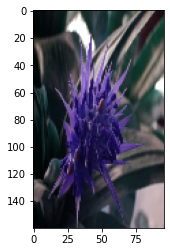

In [23]:
plt.imshow(TENegImg[0])
fd, hog_image = hog(TENegImg[0], orientations=8, pixels_per_cell=(16, 16), cells_per_block=(1, 1), visualize=True, multichannel=True)
y_predict = clf.predict(fd)
print(y_predict)
